## Preprocessing Data
[Dataset](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read data
data = pd.read_csv("/content/weatherAUS.csv")

# remove date column
data.drop(data.filter(regex = "Date"), axis = 1, inplace = True)

# remove row which contains NaN
data.dropna(inplace = True)

data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


In [46]:
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"]),
    (OneHotEncoder(handle_unknown = "ignore", sparse=False), ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday"])
)

# create X and y value
X = data.drop("RainTomorrow", axis = 1)
y = data["RainTomorrow"]

In [47]:
X, y

(       Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
 6049      Cobar     17.9     35.2       0.0         12.0      12.3   
 6050      Cobar     18.4     28.9       0.0         14.8      13.0   
 6052      Cobar     19.4     37.6       0.0         10.8      10.6   
 6053      Cobar     21.9     38.4       0.0         11.4      12.2   
 6054      Cobar     24.2     41.0       0.0         11.2       8.4   
 ...         ...      ...      ...       ...          ...       ...   
 142298   Darwin     19.3     33.4       0.0          6.0      11.0   
 142299   Darwin     21.2     32.6       0.0          7.6       8.6   
 142300   Darwin     20.7     32.8       0.0          5.6      11.0   
 142301   Darwin     19.5     31.8       0.0          6.2      10.6   
 142302   Darwin     20.2     31.7       0.0          5.6      10.7   
 
        WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
 6049           SSW           48.0        ENE         SW  ...      

### Train test split

In [67]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# fit column transformer
ct.fit(X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['MinTemp', 'MaxTemp', 'Rainfall',
                                  'Evaporation', 'Sunshine', 'WindGustSpeed',
                                  'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                                  'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                                  'Cloud9am', 'Cloud3pm', 'Temp9am',
                                  'Temp3pm']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Location', 'WindGustDir', 'WindDir9am',
                                  'WindDir3pm', 'RainToday'])])

In [68]:
X_train, X_test

(                Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
 140508            Darwin     18.4     29.9       0.0          7.0       9.4   
 64503   MelbourneAirport     17.3     34.8       0.0          8.0      13.0   
 75695           Portland     11.1     17.6       1.6          4.2       7.6   
 106889           Woomera     14.5     33.3       0.0         10.2       9.2   
 87874             Cairns     24.0     30.2       0.2          7.8       3.5   
 ...                  ...      ...      ...       ...          ...       ...   
 119161      PerthAirport      8.3     19.3       9.6          0.8       8.3   
 140143            Darwin     17.6     30.7       0.0          4.8      11.2   
 100693      MountGambier     10.3     18.2       0.2          3.2       2.0   
 9433        CoffsHarbour     18.9     28.2       0.0          7.0       7.1   
 61472               Sale      5.3     17.8       0.0          2.8       6.3   
 
        WindGustDir  WindGustSpeed Win

In [69]:
# transform train and test data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [70]:
# transform y_test and y_train to 0 and 1
y_test = y_test.apply(lambda x: 0 if x.strip()=='No' else 1)
y_train = y_train.apply(lambda x: 0 if x.strip()=='No' else 1)

In [72]:
y_test, y_train

(47050     1
 139158    0
 23488     0
 32117     0
 122837    0
          ..
 65843     0
 100882    0
 70986     1
 39109     0
 12891     0
 Name: RainTomorrow, Length: 11284, dtype: int64,
 140508    0
 64503     0
 75695     1
 106889    0
 87874     0
          ..
 119161    0
 140143    0
 100693    0
 9433      0
 61472     0
 Name: RainTomorrow, Length: 45136, dtype: int64)

## Build a neural network

In [73]:
# create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# compile the model
model_1.compile(loss = "binary_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

# create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit the model
history_1 = model_1.fit(X_train_normal, y_train, callbacks = lr_scheduler, epochs = 100)

Epoch 1/100
1411/1411 [==============================] - 4s 2ms/step - loss: 0.5381 - accuracy: 0.7797 - lr: 1.0000e-04
Epoch 2/100
1411/1411 [==============================] - 6s 4ms/step - loss: 0.4364 - accuracy: 0.7797 - lr: 1.1220e-04
Epoch 3/100
1411/1411 [==============================] - 5s 3ms/step - loss: 0.4015 - accuracy: 0.7847 - lr: 1.2589e-04
Epoch 4/100
1411/1411 [==============================] - 4s 3ms/step - loss: 0.3849 - accuracy: 0.8256 - lr: 1.4125e-04
Epoch 5/100
1411/1411 [==============================] - 7s 5ms/step - loss: 0.3752 - accuracy: 0.8349 - lr: 1.5849e-04
Epoch 6/100
1411/1411 [==============================] - 3s 2ms/step - loss: 0.3679 - accuracy: 0.8397 - lr: 1.7783e-04
Epoch 7/100
1411/1411 [==============================] - 3s 2ms/step - loss: 0.3621 - accuracy: 0.8427 - lr: 1.9953e-04
Epoch 8/100
1411/1411 [==============================] - 3s 2ms/step - loss: 0.3574 - accuracy: 0.8435 - lr: 2.2387e-04
Epoch 9/100
1411/1411 [=================

### Try to find the best learning rate

Text(0.5, 1.0, 'Learning rate vs Loss')

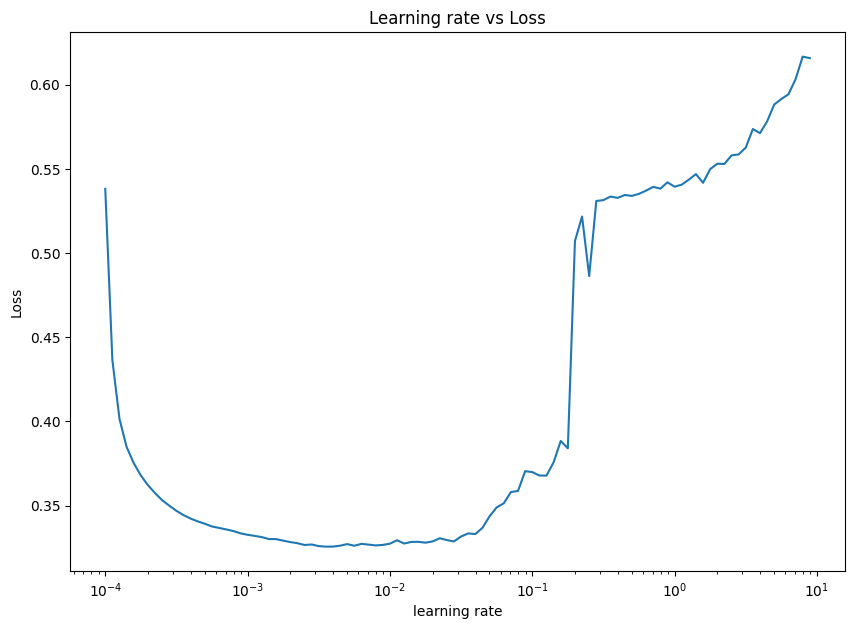

In [74]:
# plot the learning rate vs the loss to find where the loss decrease fastest (penurunan loss tercepat ada di learning rate yang mana?)
lrs = 1e-4 * (10** (tf.range(100)/20))
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history_1.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

## try a higher ideal learning rate with the same model as before


In [75]:
# create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# compile the model
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])

# fit the model
history_2 = model_2.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
1411/1411 [==============================] - 8s 2ms/step - loss: 0.3734 - accuracy: 0.8337
Epoch 2/100
1411/1411 [==============================] - 4s 3ms/step - loss: 0.3459 - accuracy: 0.8464
Epoch 3/100
1411/1411 [==============================] - 4s 3ms/step - loss: 0.3418 - accuracy: 0.8495
Epoch 4/100
1411/1411 [==============================] - 4s 3ms/step - loss: 0.3406 - accuracy: 0.8496
Epoch 5/100
1411/1411 [==============================] - 4s 2ms/step - loss: 0.3397 - accuracy: 0.8506
Epoch 6/100
1411/1411 [==============================] - 7s 5ms/step - loss: 0.3385 - accuracy: 0.8500
Epoch 7/100
1411/1411 [==============================] - 6s 4ms/step - loss: 0.3377 - accuracy: 0.8516
Epoch 8/100
1411/1411 [==============================] - 4s 3ms/step - loss: 0.3390 - accuracy: 0.8514
Epoch 9/100
1411/1411 [==============================] - 6s 4ms/step - loss: 0.3379 - accuracy: 0.8514
Epoch 10/100
1411/1411 [==============================] - 6s 4ms/step - l

## Confusion Matrix

In [76]:
# make predictions
y_preds = model_2.predict(X_test_normal)
y_preds

353/353 [==============================] - 1s 1ms/step


array([[0.04083404],
       [0.00483919],
       [0.35041928],
       ...,
       [0.05434938],
       [0.00319342],
       [0.02162625]], dtype=float32)

In [77]:
# convert to binary format
y_preds = tf.round(y_preds)
y_preds

<tf.Tensor: shape=(11284, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [78]:
from sklearn.metrics import confusion_matrix

# create confusion matrix
confusion_matrix(y_test, y_preds)

array([[8190,  609],
       [1001, 1484]])

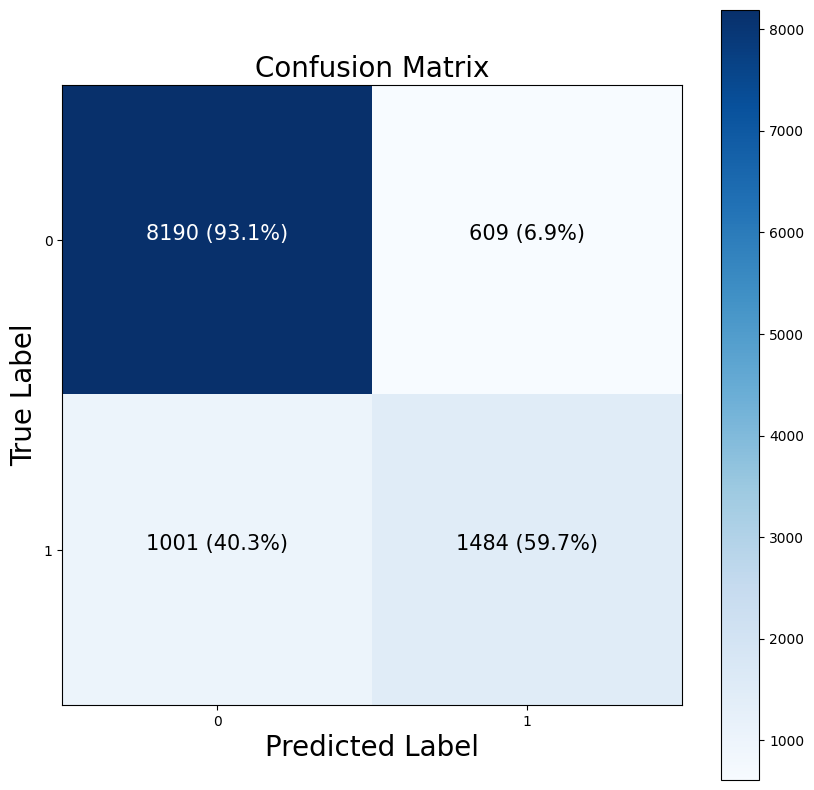

In [79]:
# prettify the confusion matrix
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 

import itertools

figsize = (10, 10)

# create the confusion matrix
cm = confusion_matrix(y_test, y_preds)
cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis] # normalize confusion matrix
n_classes = cm.shape[0]

# prettify it
fig, ax = plt.subplots(figsize = figsize)
# create a matrix plot
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

# create classes 
classes = False
labels = np.arange(cm.shape[0])

# label the axes
ax.set(title = "Confusion Matrix", 
       xlabel = "Predicted Label", 
       ylabel = "True Label", 
       xticks = np.arange(n_classes), 
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# adjust the label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment = "center",
           color = "white" if cm[i, j] > threshold else "black",
           size = 15)